# **Opening Up Cleaned Data File**

In [ ]:
# Import libraries
import os
import pandas as pd
import numpy as np

In [ ]:
#accessing my Google Drive
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# root_dir is the path to My_Drive folder.
root_dir = "/content/drive/My Drive/"

#accessing data folder
data_folder = root_dir + "Colab Notebooks/MPP Science Replication Package/Data/csv"

# change directory to the data folder
os.chdir(data_folder)

In [ ]:
#accessing the clean data that I'll be working with in the folder
survey_df = pd.read_csv('survey_df1.csv')
#print first 5 ust to look at data
survey_df.head()

,id,resp_male,resp_age,resp_black,resp_highed,el_flushot,authority,video_race,concordant,video_length,watch_video,rating_trust,rating_qualified
0,18197,1,39.0,1,2,Unknown,doc,0,0,long,1,6,6
1,5465,1,46.0,1,2,Unknown,doc,0,0,short,1,5,6
2,7534,1,31.0,1,2,Unknown,doc,0,0,short,1,6,5
3,5456,1,47.0,1,2,Unknown,lay,1,1,short,1,5,5
4,4758,1,39.0,1,2,Unknown,doc,0,0,long,1,5,5


## **Reviewing Data Against Summary Stats**



In [ ]:
#include both numeric and catergorical columns to review general summary stats
survey_df.describe(include = 'all')

,id,resp_male,resp_age,resp_black,resp_highed,el_flushot,authority,video_race,concordant,video_length,watch_video,rating_trust,rating_qualified
count,2893.000000,2893.0,2893.000000,2893.000000,2893.000000,2893,2893,2893.000000,2893.000000,2893,2893.000000,2893.000000,2893.000000
unique,NaN,NaN,NaN,NaN,NaN,3,2,NaN,NaN,2,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Unknown,doc,NaN,NaN,short,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,2228,2463,NaN,NaN,2483,NaN,NaN,NaN
mean,11430.949188,1.0,36.826132,0.577947,1.883166,NaN,NaN,0.501901,0.504321,NaN,1.136882,5.145524,5.225026
std,4927.858611,0.0,6.742281,0.493972,0.321278,NaN,NaN,0.500083,0.500068,NaN,0.611608,1.517274,1.476008
min,3882.000000,1.0,25.000000,0.000000,1.000000,NaN,NaN,0.000000,0.000000,NaN,1.000000,1.000000,1.000000
25%,7434.000000,1.0,31.000000,0.000000,2.000000,NaN,NaN,0.000000,0.000000,NaN,1.000000,5.000000,5.000000
50%,10444.000000,1.0,36.000000,1.000000,2.000000,NaN,NaN,1.000000,1.000000,NaN,1.000000,5.000000,5.000000
75%,15538.000000,1.0,42.000000,1.000000,2.000000,NaN,NaN,1.000000,1.000000,NaN,1.000000,6.000000,6.000000


Not very clean so I am going to seperate the columns into catergorical and numeric variables.

In [ ]:
#reveiw data types to evaluate sort
intialdt = survey_df.dtypes
print(intialdt)

id                    int64
resp_male             int64
resp_age            float64
resp_black            int64
resp_highed           int64
el_flushot           object
authority            object
video_race            int64
concordant            int64
video_length         object
watch_video           int64
rating_trust          int64
rating_qualified      int64
dtype: object


The object need to be classified better, so I am going to reclassify the data types so they are easier to manipulate as I perform EDA, throughout this assignment.

###**Cleaning Data**




In [ ]:
#TRANSFORM DATA TYPE TO categorical
  #id                    int64
survey_df['id'] = survey_df['id'].astype('category')
  #video_length         object
survey_df ['video_length'] = survey_df ['video_length'].astype('category')
  #resp_highed           int64
survey_df['resp_highed'] = survey_df ['resp_highed'].astype('category')
  #authority            object
survey_df['authority'] = survey_df ['authority'].astype('category')
  #video_race            int64
survey_df['video_race'] = survey_df ['video_race'].astype('category')
  #el_flushot            int64
survey_df ['el_flushot'] = survey_df ['el_flushot'].astype('category')  #change the category of el_flushot



#TRANSFORM DATA TYPE TO INTEGER
  #resp_age            float64
survey_df['resp_age'] = survey_df['resp_age'].astype('int')
#Keep same
  #rating_qualified      int64
  #rating_trust          int64


#TRANSFORM DATA TYPE TO BOOLEAN
  #resp_black             int64
survey_df['resp_black'] = survey_df['resp_black'].astype('bool') # Two outcomes: true/false
  #resp_male             int64
survey_df ['resp_male'] = survey_df ['resp_male'].astype('bool') # Two outcomes: true/false
  #watch_video           int64
survey_df ['watch_video'] = survey_df ['watch_video'].astype('bool') # Two outcomes: true/false
  #concordant            int64
survey_df ['concordant'] = survey_df ['concordant'].astype('bool') # Two outcomes: true/false

#print out past dt and new dt
print(f"Intial Data Types: \n{intialdt}")
print(f"\nCleaned Data Types: \n{survey_df.dtypes}")

Intial Data Types: 
id                    int64
resp_male             int64
resp_age            float64
resp_black            int64
resp_highed           int64
el_flushot           object
authority            object
video_race            int64
concordant            int64
video_length         object
watch_video           int64
rating_trust          int64
rating_qualified      int64
dtype: object

Cleaned Data Types: 
id                  category
resp_male               bool
resp_age               int64
resp_black              bool
resp_highed         category
el_flushot          category
authority           category
video_race          category
concordant              bool
video_length        category
watch_video             bool
rating_trust           int64
rating_qualified       int64
dtype: object


In [ ]:
#review summary stats
survey_df.describe(include = 'all')

,id,resp_male,resp_age,resp_black,resp_highed,el_flushot,authority,video_race,concordant,video_length,watch_video,rating_trust,rating_qualified
count,2893.0,2893,2893.000000,2893,2893.0,2893,2893,2893.0,2893,2893,2893,2893.000000,2893.000000
unique,2893.0,1,NaN,2,2.0,3,2,2.0,2,2,1,NaN,NaN
top,20809.0,True,NaN,True,2.0,Unknown,doc,1.0,True,short,True,NaN,NaN
freq,1.0,2893,NaN,1672,2555.0,2228,2463,1452.0,1459,2483,2893,NaN,NaN
mean,NaN,NaN,36.826132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.145524,5.225026
std,NaN,NaN,6.742281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.517274,1.476008
min,NaN,NaN,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000
25%,NaN,NaN,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,5.000000
50%,NaN,NaN,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,5.000000
75%,NaN,NaN,42.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,6.000000


Data has been seprated, and confrimed becuase only contious variable are evaluated through measure of central tendency.

I **notice** with `'age'` as also commented out in Week 8 lecture, (even though looking to change from `'float'` to `'int'`)

Changing to `'int'` still produces the same `float` numbers for summary statistics

# **Completing Check Point Tasks 5 INVESTIGATION**
---
Here I will take the data without removing the `'el_flushot'` unknown values and get the summary statisitic to see how dratcially it changes the summary statisic that was adopted before.

## 1.5 Overview Table

---

Let's create two seperate summary tables so it will be easier to work with data and different EDA due to their classifications

In [ ]:
#.describe() does the defualt of numeric columns, I am rounding to .2 for readability
numeric_summary_stats = survey_df.describe().round(2)
#print
print('Numeric Summary Stats: (vertical)')
display(numeric_summary_stats) #display for table, rather than print

#describe the catergorical columns, specify
categorical_summary_stats = survey_df.describe(include = ['object', 'category','bool'])
print('\nCategorical Summary Stats: (vertical)')
display(categorical_summary_stats) #display for table, rather than print

#transpose the stats and display
numeric_summary_stats_T = numeric_summary_stats.T
categorical_summary_stats_T = categorical_summary_stats.T

print('\n\nNumeric Summary Stats: (transposed)')
display(numeric_summary_stats_T) #display for table, rather than print

print('\nCategorical Summary Stats: (transposed)')
display(categorical_summary_stats_T) #display for table, rather than print



Numeric Summary Stats: (vertical)


,resp_age,rating_trust,rating_qualified
count,2893.00,2893.00,2893.00
mean,36.83,5.15,5.23
std,6.74,1.52,1.48
min,25.00,1.00,1.00
25%,31.00,5.00,5.00
50%,36.00,5.00,5.00
75%,42.00,6.00,6.00
max,51.00,7.00,7.00



Categorical Summary Stats: (vertical)


,id,resp_male,resp_black,resp_highed,el_flushot,authority,video_race,concordant,video_length,watch_video
count,2893,2893,2893,2893,2893,2893,2893,2893,2893,2893
unique,2893,1,2,2,3,2,2,2,2,1
top,20809,True,True,2,Unknown,doc,1,True,short,True
freq,1,2893,1672,2555,2228,2463,1452,1459,2483,2893




Numeric Summary Stats: (transposed)


,count,mean,std,min,25%,50%,75%,max
resp_age,2893.0,36.83,6.74,25.0,31.0,36.0,42.0,51.0
rating_trust,2893.0,5.15,1.52,1.0,5.0,5.0,6.0,7.0
rating_qualified,2893.0,5.23,1.48,1.0,5.0,5.0,6.0,7.0



Categorical Summary Stats: (transposed)


,count,unique,top,freq
id,2893,2893,20809,1
resp_male,2893,1,True,2893
resp_black,2893,2,True,1672
resp_highed,2893,2,2,2555
el_flushot,2893,3,Unknown,2228
authority,2893,2,doc,2463
video_race,2893,2,1,1452
concordant,2893,2,True,1459
video_length,2893,2,short,2483
watch_video,2893,1,True,2893


### **Overview Table Takeaways**


---


I think what's interesting about this is that for the `'el_flushot'` question in the survey--from my clean data- 499 respondents indicated that they did receive their flu shot. It's also interesting that majority of men in this dataset are white (I've provided value statistics below). ** this is now reflective of majority black men

I know that last week, during the Final Checkpoint 3, you (Dr.Klugman) pointed out that removing the null values from `'el_flushot'` would eliminate a lot of data. In my final presentation, I hope to highlight this issue, as I am now curious to explore the race of individuals who did not wish answer whether they received their flu shot or not. This may reveal a correlation between non-response and race, and could help highlight what does vaccination participation look among Black men when we are just discussing participation.

# **UPDATE WITH INVESTIGATION**
** As I highlighted, I want to note that I had to remove `'el_flushot'` from `'bool'` and make it categorical due to the 3 cases now present for the variable

In [ ]:
survey_df['resp_black'].value_counts()

,count
resp_black,
True,1672
False,1221


# 2.5 Univarite

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

## ***Numeric Box Plots***

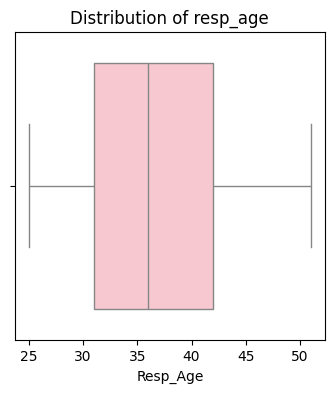

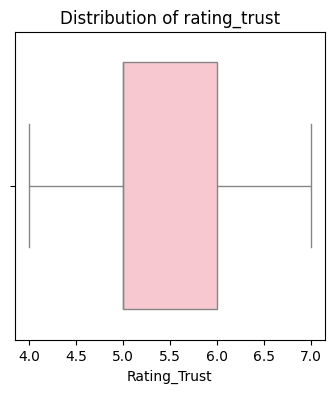

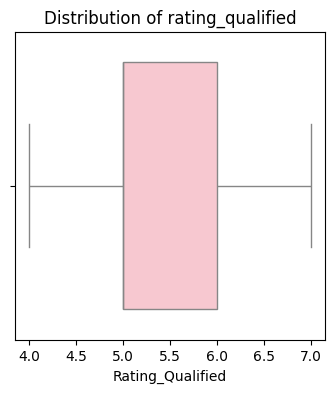

In [ ]:
#created a for loop to go through the numeric statistics and print out all box plots
for i in numeric_summary_stats:
    plt.figure(figsize=(4,4)) #i wanted it more compacted than what was orginally provided
    sns.boxplot(x=i, data=survey_df, showfliers=False, color='pink')
    plt.xlabel(f'{i.title()}') #label x axis the name of the variable .title() for readability
    plt.title(f'Distribution of {i}') #title it the name of the variable
    plt.show()


### **Box Plot Numeric Univarite Takeaways Pt. 1**


---

For `'rating_trust'`, the 25th percentile = **5** and median (50%) = **5** so we do not see a visible median line in the box plot.

For `'rating_qualified'`, the 75th percentile = **5** and the median (50%) = **5** so we do not see a visible median line in the box plot.

*I found a solution to highlight the median this below

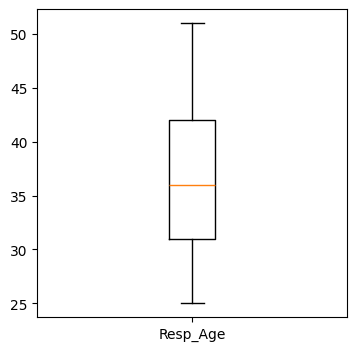

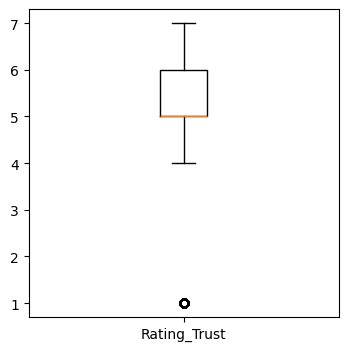

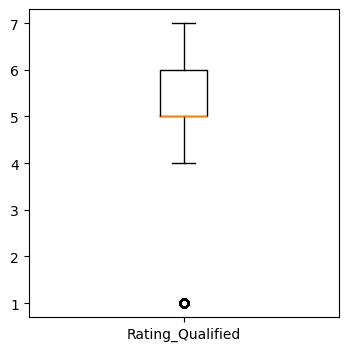

In [ ]:
#to show median lines because plt highlights median line orange (as seen in "EDA_baseball_updated-1.ipynb")
for i in numeric_summary_stats:
  plt.figure(figsize=(4,4))#i wanted it more compacted than what was orginally provided
  plt.boxplot(survey_df[i], tick_labels = {i.title()}) #argument 'labels' no longer exist in plt had to use 'tick_labels' or else warning
  plt.show()

### **Box Plot Numeric Univarite Takeaways Pt.2**


---


In this Box Plot not only can we see the median highlighted in orange, but we also see more prominent outliers, I still question as to why 2-3 are not accounted for in `'rating qualified'` and `'rating_trust'` but my assumption is that a respondant choosing `'1'` is them choosing not to rate this trust or qualification (or potentially the '3' in a 1-5 scale) and I think `4-7` represent quantifiable measures from the appropriate scales.

# **UPDATE WITH INVESTIGATION**
Rating qualified median has shifted from **6** to **5**

## ***Numeric Historgrams***

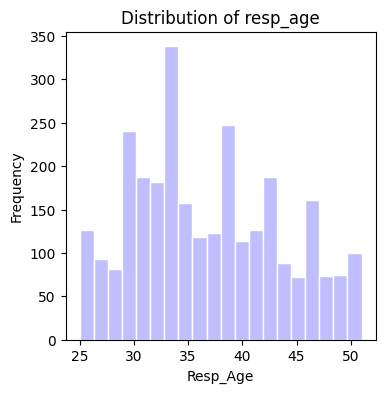

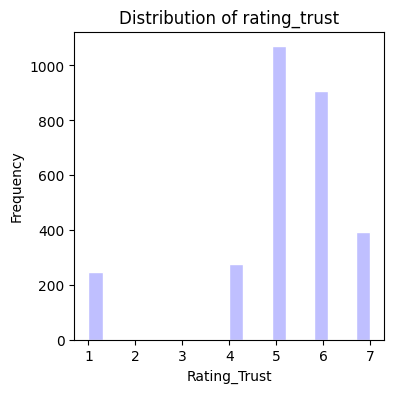

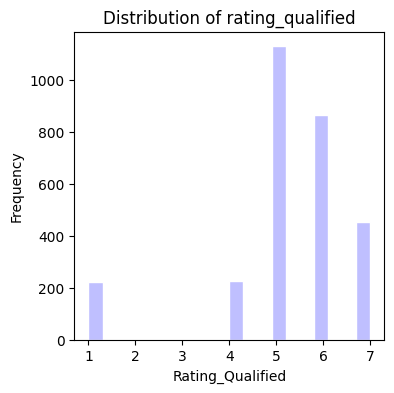

In [ ]:
#created a for loop to go through the numeric statistics and print out all histograms
for i in numeric_summary_stats:
    plt.figure(figsize=(4,4))#i wanted it more compacted than what was orginally provided
    sns.histplot(x=i, data=survey_df, bins=20, color='blue', alpha=0.25,edgecolor='white')
    plt.xlabel(f'{i.title()}')# label x-axis with the variable name
    plt.ylabel('Frequency')#label y-axis
    plt.title(f'Distribution of {i}')#title for readability
    plt.show()

### **Historgram Numeric Univarite Takeaways**


---

As speculated for `'rating_qualified'` and `'rating_trust'` there is a normal ditrbuton curve in bettwen the values 4-7 with '1' is an outlier. Other than that `'resp_age'` has a couple peaks and we can see that participating repsondant were 25+. Looking at the age through the curve, I think it would be interesting to identify how age plays a role in vaccinations because from the articles I orginally gathered, a lot of historical patterns are reasons why indivduals do not participate.



## ***Categorical Box Plots***

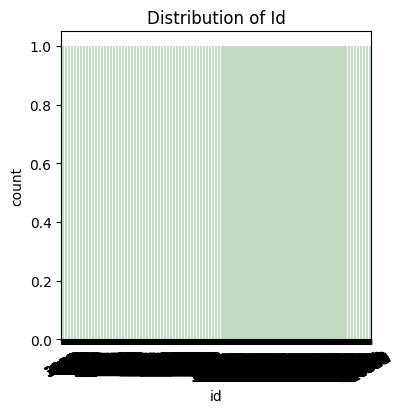

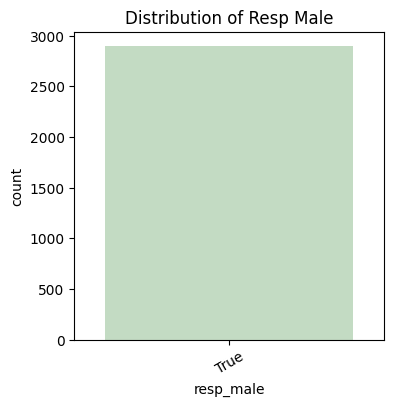

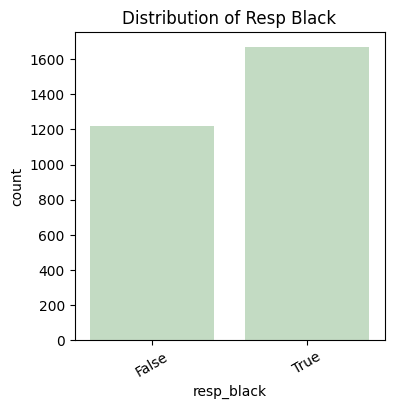

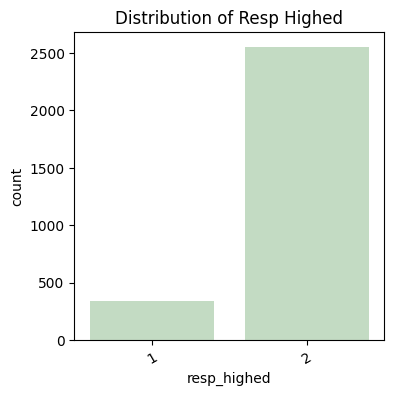

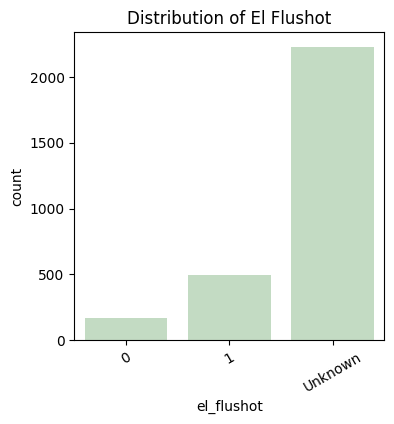

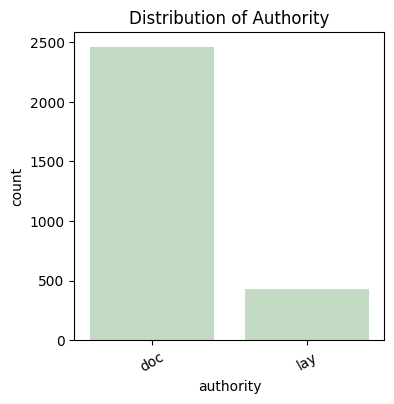

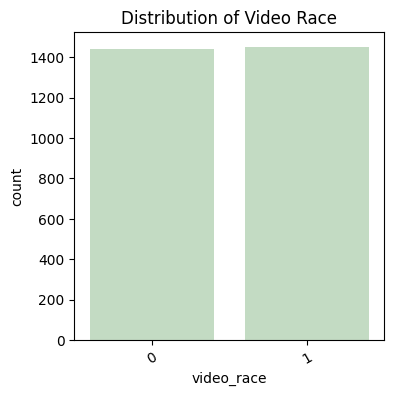

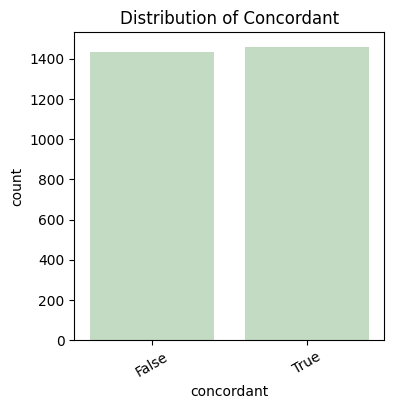

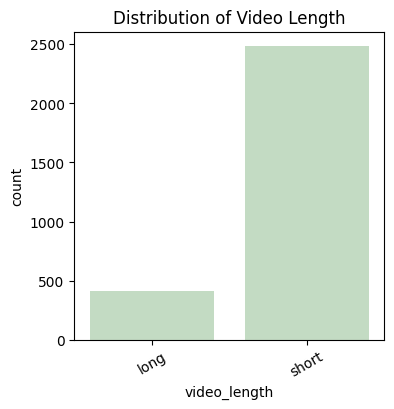

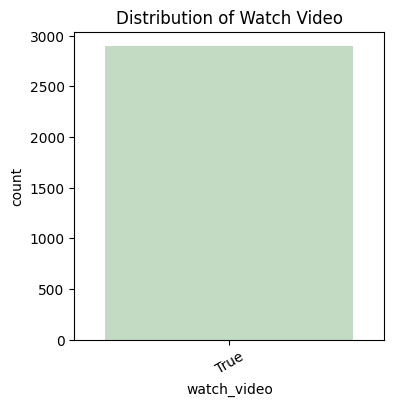

In [ ]:
#created a for loop to go through the catergocial statistics and print out all bar charts
for i in categorical_summary_stats:
    plt.figure(figsize=(4,4)) #i wanted it more compacted than what was orginally provided
    sns.countplot(x=i, data=survey_df, color='green',alpha=.25)
    plt.xlabel(f'{i}')
    plt.title(f'Distribution of {i.replace("_"," ").title()}')
    plt.xticks(rotation=30)#for redability
    plt.show()

### **Bar Chart Categorical Univarite Takeaways**

# **UPDATE WITH INVESTIGATION**
---

The distrubuiton of `'id'` is not readible but that makes sense because there are now 2893 unique values

Are white respondant are now less than of our black respondants

As for the video there are a lot of short video and a lot of videos include the authority being 'doc'.

For `'concordant'` the data is almost 50/50, there are 1459 repsondants who had concordants.

## 3.5 **Relationships**

In [ ]:
corr_matrix = survey_df.corr(numeric_only=True)
corr_matrix

,resp_male,resp_age,resp_black,concordant,watch_video,rating_trust,rating_qualified
resp_male,NaN,NaN,NaN,NaN,NaN,NaN,NaN
resp_age,NaN,1.000000,-0.166458,-0.014597,NaN,0.006395,0.002717
resp_black,NaN,-0.166458,1.000000,0.002486,NaN,0.005391,-0.004858
concordant,NaN,-0.014597,0.002486,1.000000,NaN,-0.034325,-0.075102
watch_video,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating_trust,NaN,0.006395,0.005391,-0.034325,NaN,1.000000,0.712136
rating_qualified,NaN,0.002717,-0.004858,-0.075102,NaN,0.712136,1.000000


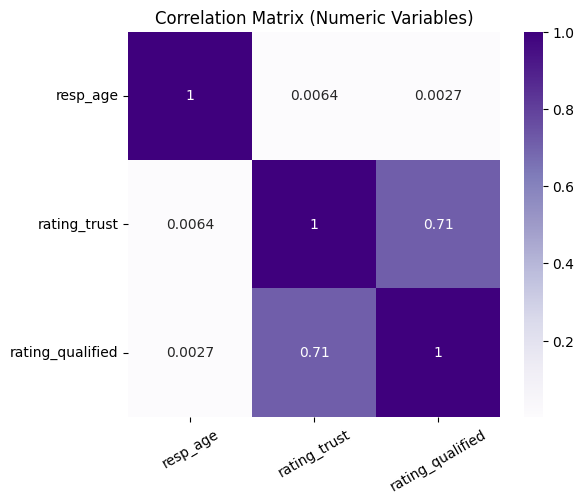

In [ ]:
corr_vars = ['resp_age','rating_trust', 'rating_qualified']
corr_matrix = survey_df[corr_vars].corr()

plt.figure(figsize=(6,5))
plt.title("Correlation Matrix (Numeric Variables)")

sns.heatmap(corr_matrix, annot=True, cmap="Purples")

plt.xticks(rotation=30)
plt.yticks(rotation=360)

plt.show()

# **UPDATE WITH INVESTIGATION**
1.  The correlation between `'rating_trust'` and `'rating_qualified'` has increased.
2.  There is now a postiive correlation (although not strong) between `'resp_age'` and `'rating_trust'` and `'rating_qualified'`

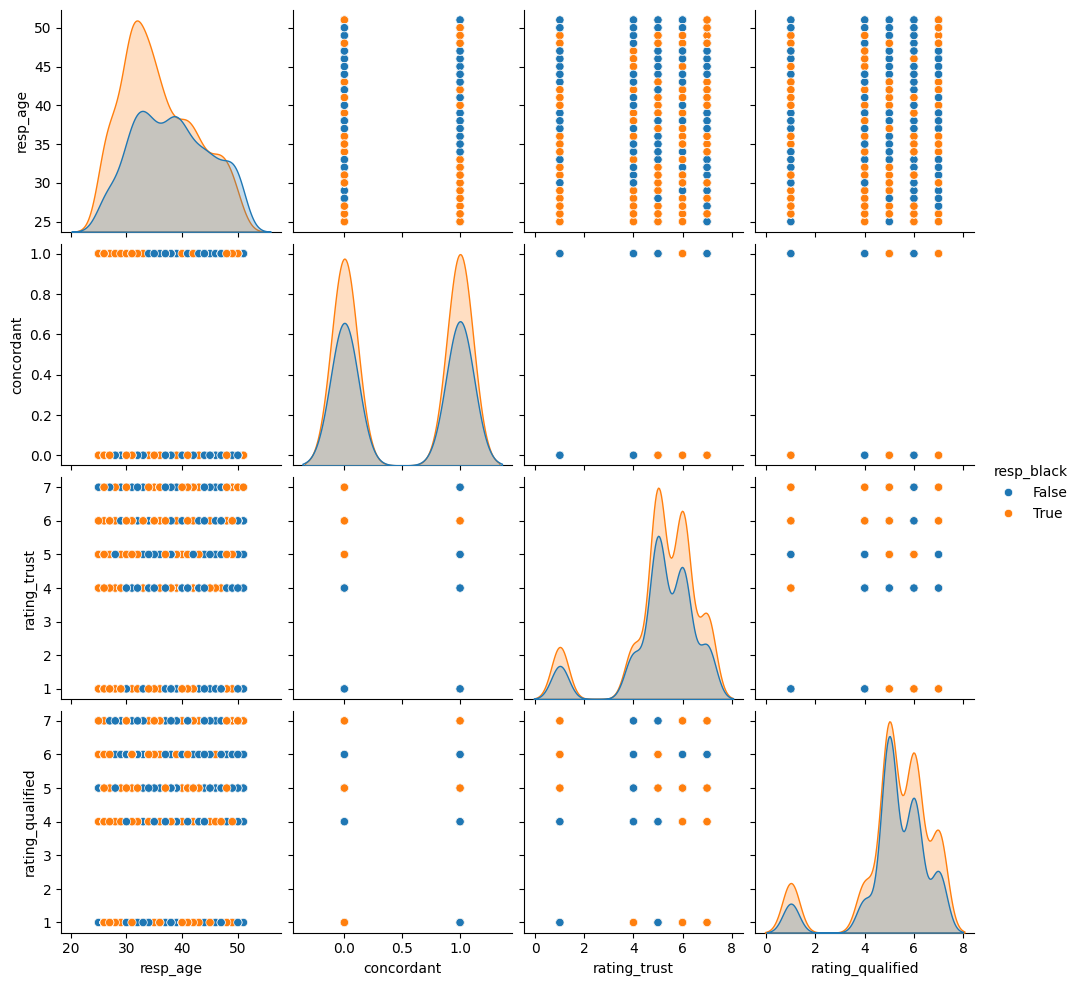

In [ ]:
# make the pairplot figure
survey_df_minus = survey_df.drop(columns=['resp_male','watch_video','id']) #both are 100% & 'id' is all unique
pairplot_figure = sns.pairplot(data=survey_df_minus,hue='resp_black')
_ = plt.show()

# **UPDATE WITH INVESTIGATION**



1. A lot of the black respondant age lies around 30-35 years of age, but we the distrubiton for white males did not just grew in number but has similar distrbuition curve as before
2. The `'concordant'` distrbuion grew for those that didnt have a `'concordant'` in their video
3. There are more disctint peaks in `'rating_trust'` well as `'rating_qualified'`


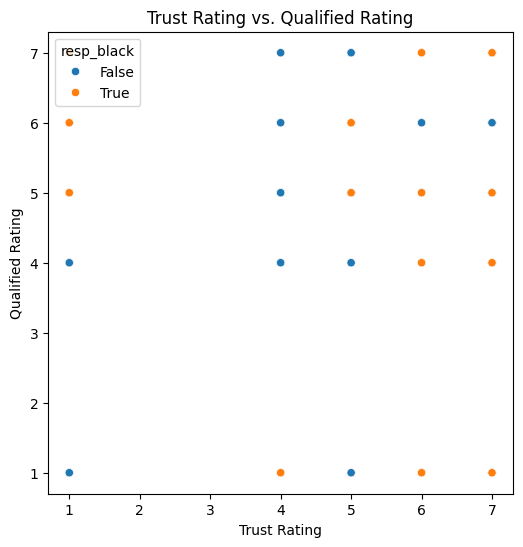

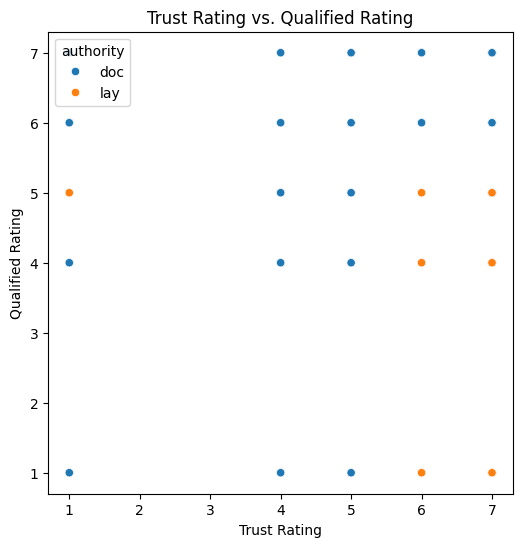

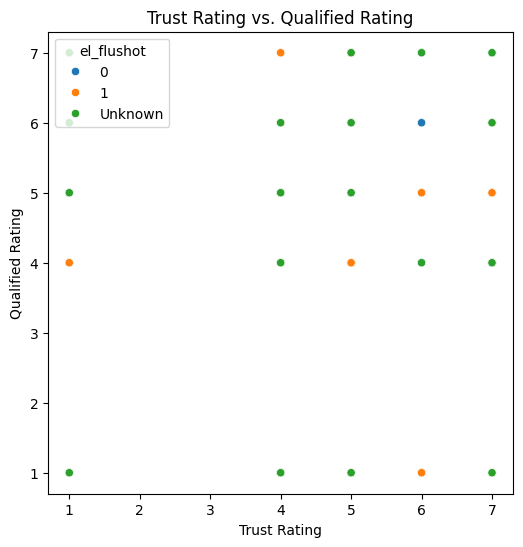

In [ ]:
# create scatter plot
scatter_fig = plt.figure(figsize=(6,6))
_ = sns.scatterplot(data = survey_df, x = 'rating_trust', y= 'rating_qualified', hue='resp_black')
# set descriptors
plt.title("Trust Rating vs. Qualified Rating")
plt.xlabel("Trust Rating")
plt.ylabel("Qualified Rating")

# Show plot
plt.show()

# create scatter plot
scatter_fig = plt.figure(figsize=(6,6))
_ = sns.scatterplot(data = survey_df, x = 'rating_trust', y= 'rating_qualified', hue='authority')
# set descriptors
plt.title("Trust Rating vs. Qualified Rating")
plt.xlabel("Trust Rating")
plt.ylabel("Qualified Rating")

# Show plot
plt.show()

# create scatter plot
scatter_fig = plt.figure(figsize=(6,6))
_ = sns.scatterplot(data = survey_df, x = 'rating_trust', y= 'rating_qualified', hue='el_flushot')
# set descriptors
plt.title("Trust Rating vs. Qualified Rating")
plt.xlabel("Trust Rating")
plt.ylabel("Qualified Rating")

# Show plot
plt.show()

Most of the blue points (non-Black respondents) are clustered toward higher qualified ratings (4-7) across a range of trust ratings. The orange points (Black respondents) appear at lower qualified ratings (4-7), with less overall spread. There doesn't seem to be a *strongg* linear trend between `'rating_trust'` and `'rating_qualified'` but points are scattered in clusters rather than along a line, not the best for readabiity

## 4.5 Groups

In [ ]:
#groupby() race to see distrbution of central tendency markers
survey_df.groupby('resp_black')[corr_vars].agg(['mean', 'std', 'min', 'max']).T.round(2)

resp_black             False  True 
resp_age         mean  38.14  35.87
                 std    6.76   6.56
                 min   25.00  25.00
                 max   51.00  51.00
rating_trust     mean   5.14   5.15
                 std    1.47   1.55
                 min    1.00   1.00
                 max    7.00   7.00
rating_qualified mean   5.23   5.22
                 std    1.37   1.55
                 min    1.00   1.00
                 max    7.00   7.00

## **Flu Shot Parctipation by Race**


Flu Shot Response Distribution by Race


/tmp/ipython-input-1817293142.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  flu_by_race = survey_df.groupby(['resp_black', 'el_flushot']).size().reset_index(name='count')


,resp_black,el_flushot,count,percent
0,False,0,86,7.04
1,False,1,291,23.83
2,False,Unknown,844,69.12
3,True,0,80,4.78
4,True,1,208,12.44
5,True,Unknown,1384,82.78


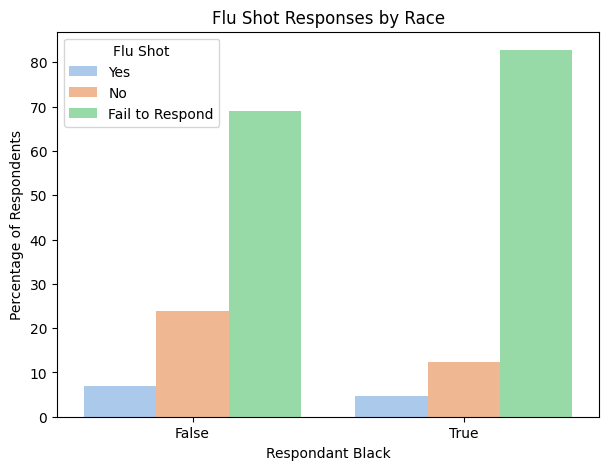

In [ ]:
# Count how many responses for each race and flu shot category
flu_by_race = survey_df.groupby(['resp_black', 'el_flushot']).size().reset_index(name='count')

# total counts per race
race_totals = flu_by_race.groupby('resp_black')['count'].transform('sum')

# Compute percentage
flu_by_race['percent'] = (flu_by_race['count'] / race_totals * 100).round(2)

print("\nFlu Shot Response Distribution by Race")
display(flu_by_race)


plt.figure(figsize=(7,5))
sns.barplot(x='resp_black', y='percent', hue='el_flushot', data=flu_by_race, palette='pastel')
plt.title("Flu Shot Responses by Race")
plt.ylabel("Percentage of Respondents")
plt.xlabel("Respondant Black")

#wanted to rename the labels for readbility
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Yes', 'No', 'Fail to Respond'],title='Flu Shot')
plt.show()

# **UPDATE WITH INVESTIGATION**

It’s very interesting to see the new comparison between Black and White respondents, not only how many Black respondents did not get flu shots compared to White respondents, but also how many, relative to White respondents, chose not to answer the question at all. The percentages further highlight differences in vaccination compliance.